In [127]:
# !pip install -q nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from time import time
from collections import defaultdict

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
emotion_df = pd.read_csv('text_emotion.csv')
Final_emotion_df = pd.read_csv('Emotion_final_.csv')

In [47]:
emotion_df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [48]:
Final_emotion_df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [110]:
Final_emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [50]:
stopwords = nltk.corpus.stopwords.words("english")
corpus = Final_emotion_df['Text']
target = Final_emotion_df['Emotion']

In [51]:
corpus

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

In [52]:
target

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
21454       fear
21455       fear
21456       fear
21457       fear
21458       fear
Name: Emotion, Length: 21459, dtype: object

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer 

vocabulary size; 19070


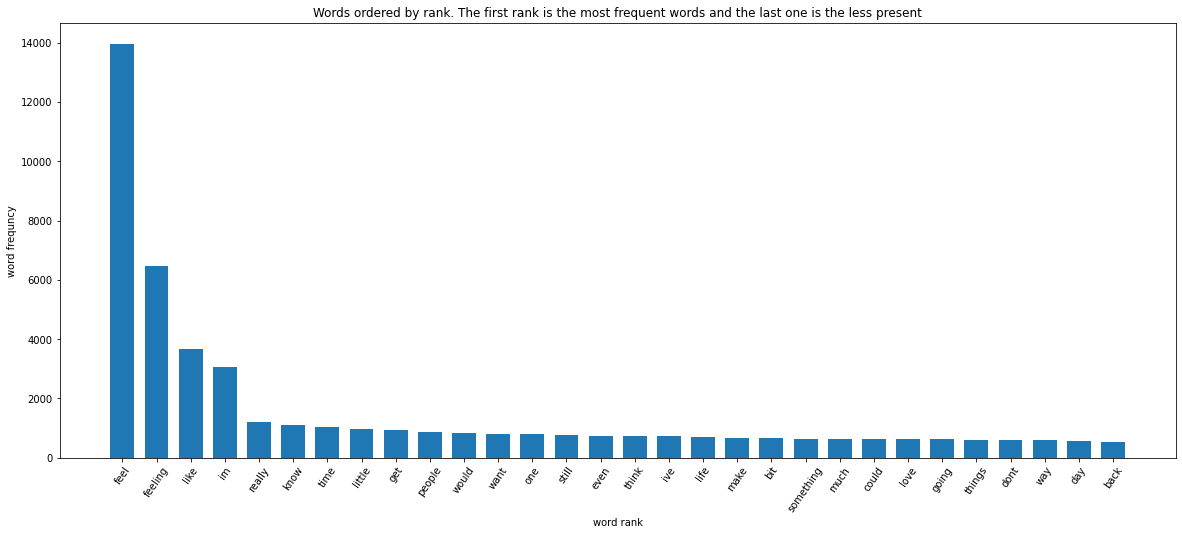

In [55]:
vec = CountVectorizer(stop_words=stopwords)
X = vec.fit_transform(corpus)
words = vec.get_feature_names()

print("vocabulary size; %d" % len(words) )

# Compute rank
wsum = np.array(X.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels_ = [words[i] for i in ix]

# Sub-sample the data to plot.
# take the 20 first + the rest sample with the given step 
def subsample(x, step=900):
    return np.hstack((x[:30], x[30:30:step]))


plt.figure(figsize=(20,8))
freq = subsample(wrank)
r = np.arange(len(freq))
plt.bar(r, freq, width=0.7)
plt.xticks(r, subsample(labels_), rotation=55)
plt.xlabel('word rank')
plt.ylabel('word frequncy')
plt.title("Words ordered by rank. The first rank is the most frequent words and the last one is the less present");


In [56]:
freq

array([13973,  6461,  3661,  3055,  1201,  1091,  1032,   960,   947,
         865,   847,   811,   802,   759,   746,   744,   723,   694,
         656,   650,   646,   643,   627,   620,   616,   615,   596,
         593,   558,   540], dtype=int64)

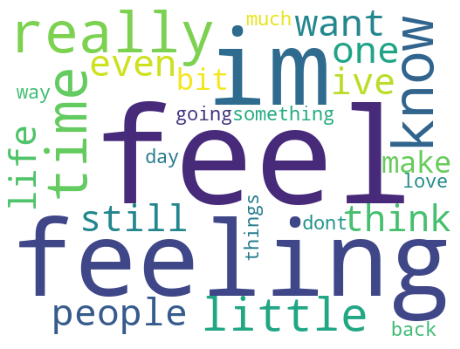

In [57]:
plt.subplots(figsize=(8,8))

x = subsample(labels_)
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wourdcloud.png')

plt.show()

In [59]:
import plotly.graph_objs as go
fig = go.Figure()
fig = go.Figure(data=[go.Histogram(x=Final_emotion_df.Emotion, name='words count'), 
                      go.Histogram(x=Final_emotion_df.Emotion, cumulative_enabled=True, name='cumulative words count')],
               layout ={
                   'title':'Emotions Histogram',
                   'xaxis_title_text': 'Emotions',
                   'yaxis_title_text': 'Count',
               })

fig.show()

In [60]:
x = subsample(labels_)
y = freq
trace = go.Bar(
                x = x,
                y = y,
                name = "Words ordered by rank. The first rank is the most frequent words and the last one is the less present",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)))


layout = go.Layout(barmode = "group")
fig = go.Figure(data = trace, layout = layout)
fig.show()

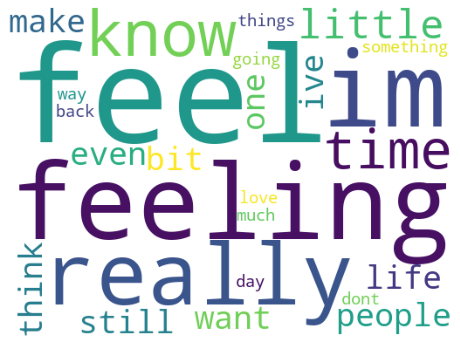

In [61]:
plt.subplots(figsize=(8,8))

x = subsample(labels_)
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wourdcloud.png')

plt.show()

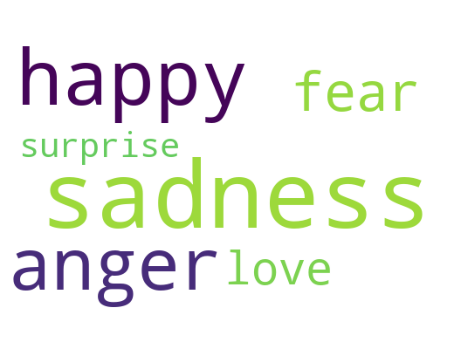

In [62]:
plt.subplots(figsize=(8,8))

x =subsample(target)
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wourdcloud.png')

plt.show()

In [63]:
labels_

['feel',
 'feeling',
 'like',
 'im',
 'really',
 'know',
 'time',
 'little',
 'get',
 'people',
 'would',
 'want',
 'one',
 'still',
 'even',
 'think',
 'ive',
 'life',
 'make',
 'bit',
 'something',
 'much',
 'could',
 'love',
 'going',
 'things',
 'dont',
 'way',
 'day',
 'back',
 'go',
 'good',
 'pretty',
 'need',
 'always',
 'see',
 'right',
 'also',
 'say',
 'feelings',
 'work',
 'feels',
 'today',
 'felt',
 'around',
 'made',
 'though',
 'cant',
 'well',
 'got',
 'never',
 'help',
 'happy',
 'didnt',
 'quite',
 'someone',
 'every',
 'less',
 'days',
 'many',
 'makes',
 'look',
 'sure',
 'enough',
 'find',
 'lot',
 'said',
 'away',
 'left',
 'home',
 'last',
 'anything',
 'kind',
 'come',
 'person',
 'ever',
 'better',
 'without',
 'take',
 'new',
 'everything',
 'getting',
 'sometimes',
 'friends',
 'world',
 'first',
 'thought',
 'started',
 'trying',
 'actually',
 'http',
 'thing',
 'remember',
 'year',
 'family',
 'week',
 'able',
 'rather',
 'times',
 'long',
 'bad',
 'two',


In [64]:
labels_tout = np.array(labels)
print(labels_tout)

In [65]:
target = np.array([1 if x == "sadness" else 2 if x=="anger" else 3 if x=="love" else 4 if x=="surprise" else 5 if x=="fear" else 6 for x in target])

In [95]:
Y_2 = target.append(traget_2)
print(Y_2)

0          sadness
1          sadness
2            anger
3             love
4            anger
           ...    
39995      neutral
39996         love
39997         love
39998    happiness
39999         love
Length: 61459, dtype: object


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X_corpus = X
Y = target
# division du dataset entre le Training set et le Test set
x_train, x_test, y_train,y_test = train_test_split(X_corpus,Y, test_size = 0.25, random_state = 0 ) 

In [67]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

In [68]:
Faire de nouvelle prediction
y_pred = classifier.predict(x_test)
classifier.score(x_test, y_test)
y_pred, y_test

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [146]:
corpus_gen = corpus.append(corpus_2)
target_gen= Y_2


In [136]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.svm import  SVC,  LinearSVC
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import f1_score

In [152]:
pipe0 = Pipeline([
    ('vect', CountVectorizer()),
    ('sgd', SGDClassifier()),
])
pipe1 = Pipeline([
    ('vect', CountVectorizer()),
    ('svm', SVC(kernel='rbf')),
])
pipe2 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('sgd', SGDClassifier()),
])
pipe3 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svml', LinearSVC()),
])
pipe4 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svm', SVC()),
])
pipe5 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('logit', LogisticRegression()),
])
pipe6 = Pipeline([
    ('vect', CountVectorizer()),
    ('mult_nb', MultinomialNB()),
])
pipe7 = Pipeline([
    ('vect', CountVectorizer()),
    ('compl_nb', ComplementNB()),
])
pipe8 = Pipeline([
    ('vect', CountVectorizer()),
    ('bern_nb', BernoulliNB()),
])

def run_pipes(pipes, splits=10, test_size=0.2, seed=42):  
    res = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed)
    for idx_train, idx_test in spliter.split(corpus):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train = corpus_gen[idx_train]
            X_test = corpus_gen[idx_test]
            y_train = target_gen[idx_train]
            y_test = target_gen[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train, y_train)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test)
            res[name].append([
                fit_time,
                f1_score(y_test, y, average='weighted'),
                f1_score(y_test, y, average='macro'),
#                 f1_score(y_test, y, pos_label=0),
            ])
    return res



In [153]:
def print_table(res):
    # Compute mean and std
    final = {}
    for model in res:
        arr = np.array(res[model])
        final[model] = {
            "time" : arr[:, 0].mean().round(2),
            "f1_weighted": [arr[:,1].mean().round(3), arr[:,1].std().round(3)],
            "f1_macro": [arr[:,2].mean().round(3), arr[:,2].std().round(3)],
            
        }

    df = pd.DataFrame.from_dict(final, orient="index").round(3)
    return df

In [155]:

res= run_pipes([pipe1, pipe2, pipe3,pipe4, pipe5, pipe6, pipe7, pipe8, pipe0], splits=1 )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [156]:
print_table(res)

,time,f1_weighted,f1_macro
vect-svm,582.69,"[0.508, 0.0]","[0.291, 0.0]"
vect-tfidf-sgd,1.48,"[0.554, 0.0]","[0.339, 0.0]"
vect-tfidf-svml,2.63,"[0.571, 0.0]","[0.355, 0.0]"
vect-tfidf-svm,669.04,"[0.543, 0.0]","[0.318, 0.0]"
vect-tfidf-logit,19.66,"[0.559, 0.0]","[0.336, 0.0]"
vect-mult_nb,0.70,"[0.384, 0.0]","[0.183, 0.0]"
vect-compl_nb,0.71,"[0.532, 0.0]","[0.315, 0.0]"
vect-bern_nb,0.72,"[0.292, 0.0]","[0.11, 0.0]"
vect-sgd,2.27,"[0.583, 0.0]","[0.365, 0.0]"


In [157]:
from joblib import dump, load
dump(res, open('donnee_Gen.joblib', 'wb')) 

In [76]:
# import pickle
# pickle.dump(res, open('data_pickle.pkl', 'wb'))

In [111]:
# emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [78]:
corpus_2 = emotion_df['content']
traget_2 = emotion_df['sentiment']

In [128]:
traget_2

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: object

In [79]:
print(corpus_2)

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object


In [80]:
print(traget_2)

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: object
